# <center>ASSIGNMENT 2</center>



## Q1.
Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)
The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.
Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.
(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.


     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


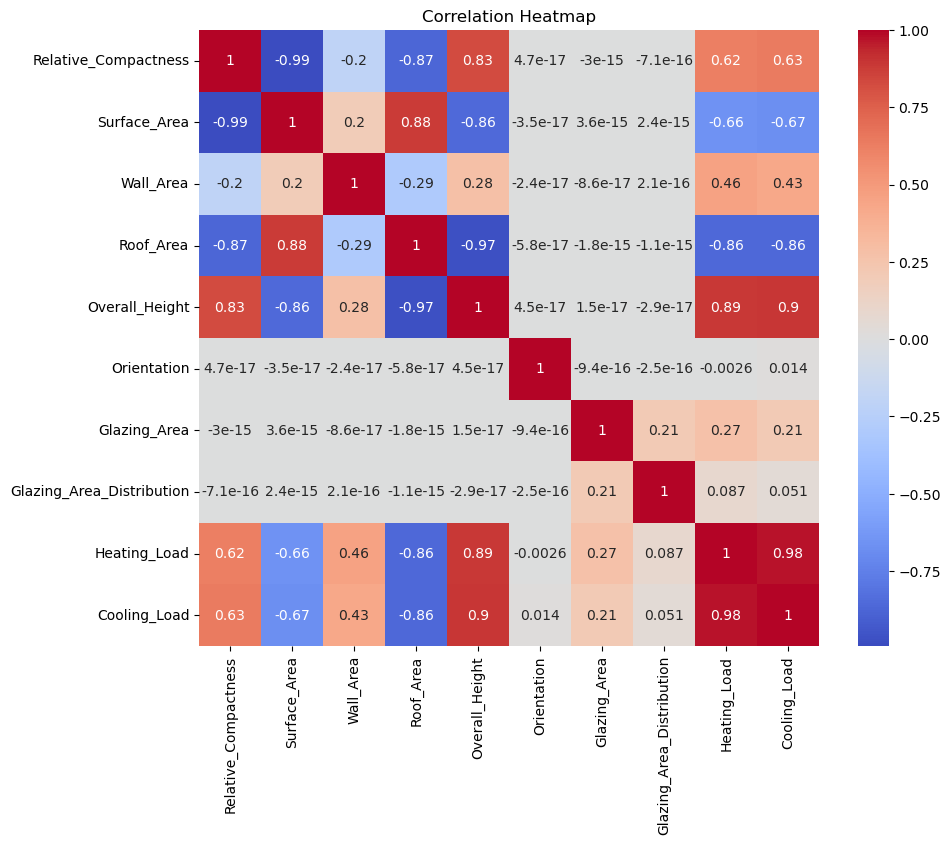

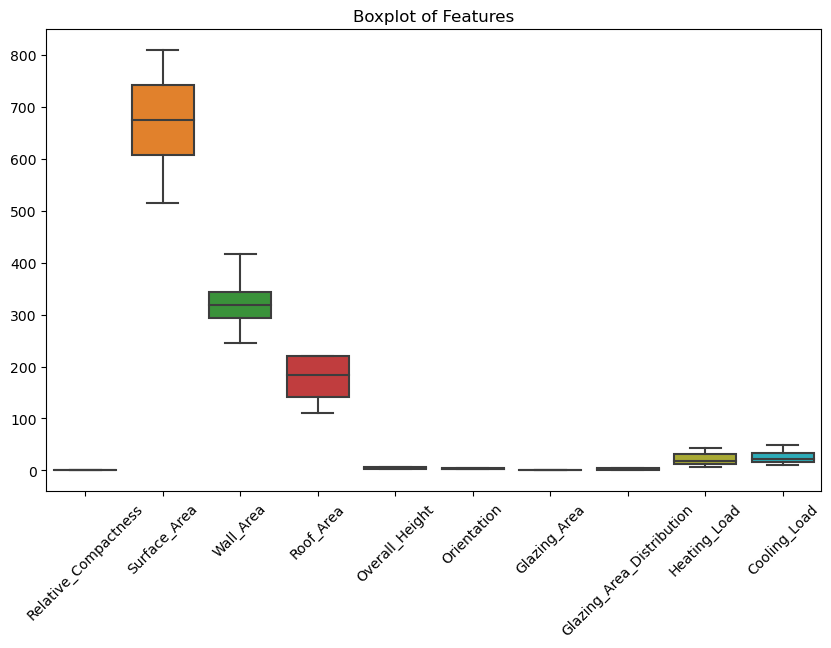

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "ENB2012_data.xlsx"

df = pd.read_excel(file_path)

print(df.head())

df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
              'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 
              'Heating_Load', 'Cooling_Load']


print(df.isnull().sum())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()



(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df['Heating_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset


In [11]:
X_train_manual = np.hstack((np.ones((X_train.shape[0], 1)), X_train.values))
X_test_manual = np.hstack((np.ones((X_test.shape[0], 1)), X_test.values))


weights = np.linalg.inv(X_train_manual.T @ X_train_manual) @ X_train_manual.T @ y_train
y_pred_manual = X_test_manual @ weights

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mse, rmse, r2


evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")


evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Manual Linear Regression - MSE: 199962020588276743667712.00, RMSE: 447171131210.72, R²: -1918424624030299979776.00
Sklearn Linear Regression - MSE: 9.14, RMSE: 3.02, R²: 0.91
Ridge Regression - MSE: 9.65, RMSE: 3.11, R²: 0.91
Lasso Regression - MSE: 21.47, RMSE: 4.63, R²: 0.79


(21.46520200798924, 4.63305536422664, 0.7940640329060296)

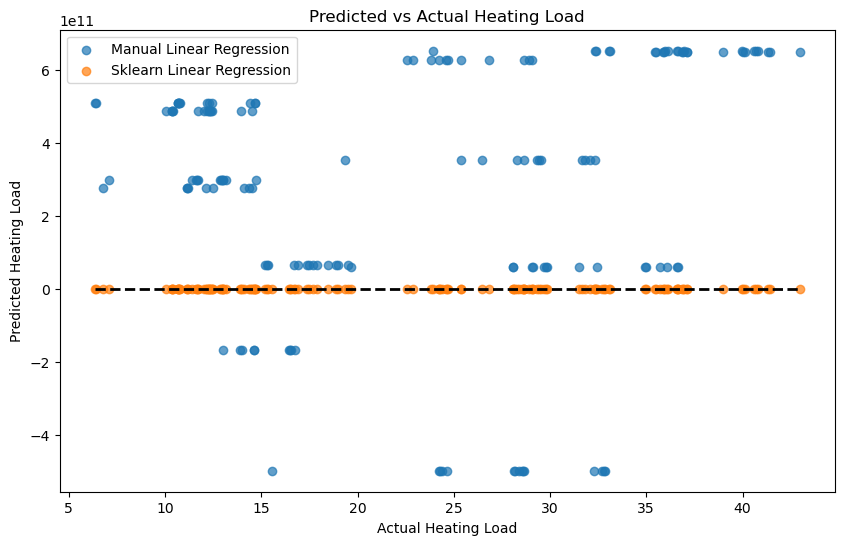

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_manual, label="Manual Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_lr, label="Sklearn Linear Regression", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted vs Actual Heating Load")
plt.show()

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

Based on feature importance (e.g., from Ridge or Lasso models):

Wall Area and Roof Area: Adjusting these can significantly reduce heating load.

Glazing Area: Optimize for balanced natural lighting and insulation.

Overall Height: Taller buildings may have more energy requirements.